# What is Kernel PCA?

PCA is a linear method. That is it can only be applied to datasets which are linearly separable. It does an excellent job for datasets, which are linearly separable. But, if we use it to non-linear datasets, we might get a result which may not be the optimal dimensionality reduction. Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable. It is similar to the idea of Support Vector Machines.There are various kernel methods like linear, polynomial, and gaussian.

In [1]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


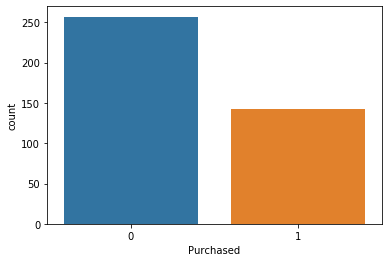

In [4]:
sb.countplot(data['Purchased'])
plt.show()

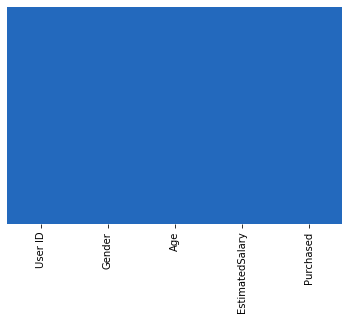

In [5]:
sb.heatmap(data.isna(), yticklabels=False,cbar=False, cmap = 'vlag')
plt.show()

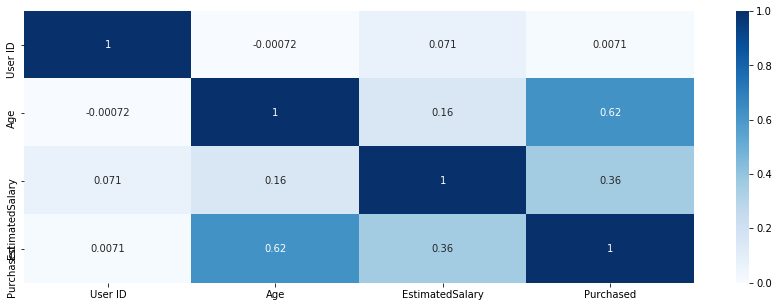

In [6]:
fig, ax = plt.subplots(figsize = (15, 5))
bx = sb.heatmap(data.corr(), annot = True, cmap = 'Blues')
bottom, top = bx.get_ylim()
bx.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

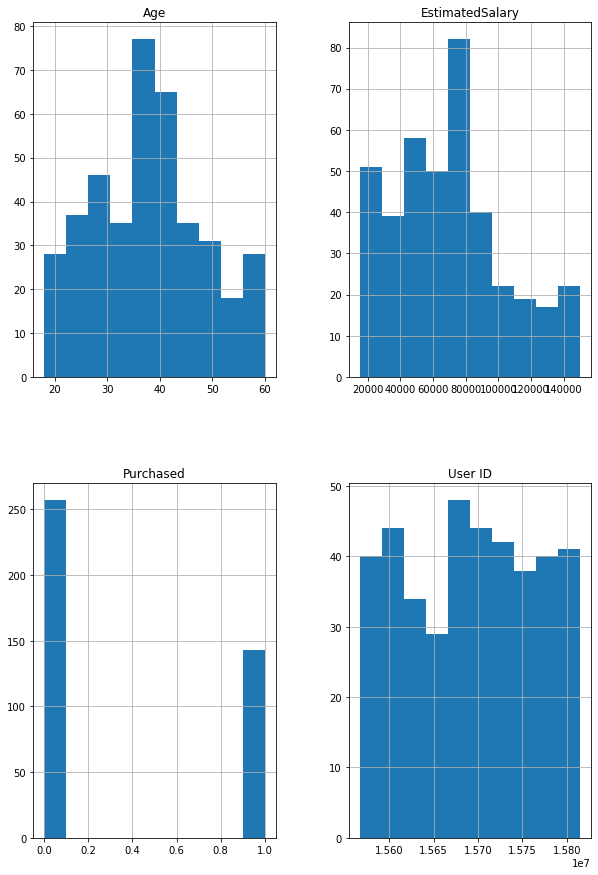

In [7]:
data.hist(figsize = (10, 15))
plt.show()

In [8]:
len(data['User ID'].value_counts())

400

In [9]:
data.shape

(400, 5)

In [10]:
data.drop(['User ID', 'Gender'], axis = 1, inplace = True)

In [11]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


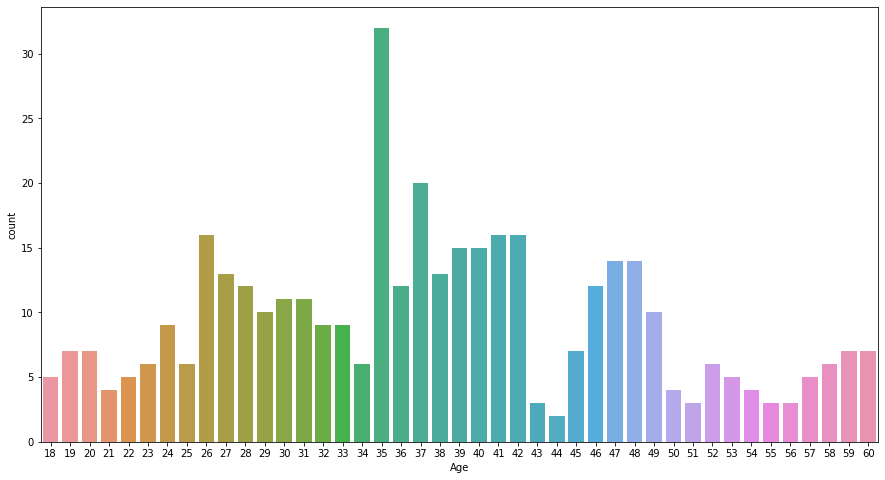

In [12]:
fig, ax = plt.subplots(figsize = (15, 8))
sb.countplot(data['Age'])
plt.show()

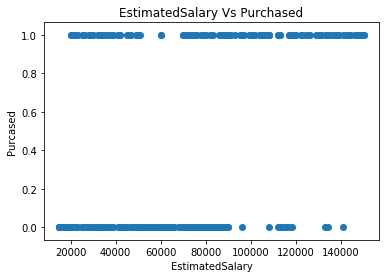

In [43]:
plt.scatter(data['EstimatedSalary'], data['Purchased'])
plt.xlabel('EstimatedSalary')
plt.ylabel('Purcased')
plt.title('EstimatedSalary Vs Purchased')
plt.show()

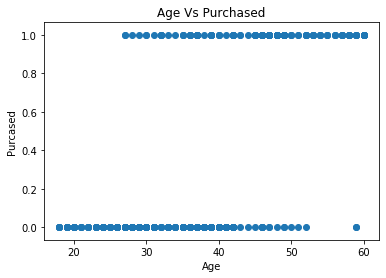

In [44]:
plt.scatter(data['Age'], data['Purchased'])
plt.xlabel('Age')
plt.ylabel('Purcased')
plt.title('Age Vs Purchased')
plt.show()

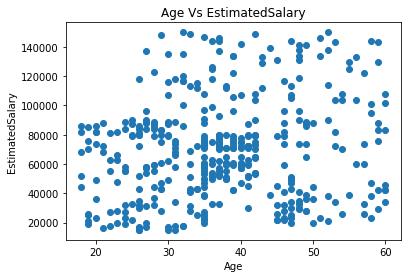

In [45]:
plt.scatter(data['Age'], data['EstimatedSalary'])
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Age Vs EstimatedSalary')
plt.show()

In [13]:
X = data.iloc[:, 0:-1]
Y = data.iloc[:, -1:].values

In [14]:
X.shape, Y.shape

((400, 2), (400, 1))

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [16]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((320, 2), (320, 1), (80, 2), (80, 1))

# Applying Kernel PCA

In [17]:
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
x_train = kpca.fit_transform(x_train)
x_test = kpca.transform(x_test)

In [18]:
x_train.shape, x_test.shape

((320, 2), (80, 2))

# Fitting Logistic Regression to the Training Set 

In [19]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = lr.predict(x_test)

In [21]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        58
           1       0.00      0.00      0.00        22

    accuracy                           0.73        80
   macro avg       0.36      0.50      0.42        80
weighted avg       0.53      0.72      0.61        80



In [23]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[58,  0],
       [22,  0]])

# Scaling the features

In [24]:
df = data

In [25]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [26]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1:].values

In [27]:
x.shape, y.shape

((400, 2), (400, 1))

In [28]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [29]:
x[0]

array([-1.78179743, -1.49004624])

In [30]:
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [31]:
x_scaled_train.shape, y_scaled_train.shape, x_scaled_test.shape, y_scaled_test.shape

((320, 2), (320, 1), (80, 2), (80, 1))

# Applying Kernel PCA

In [33]:
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
x_scaled_train = kpca.fit_transform(x_scaled_train)
x_scaled_test = kpca.transform(x_scaled_test)

In [34]:
x_scaled_train.shape, x_scaled_test.shape

((320, 2), (80, 2))

# Fitting Logistic Regression to the Training Set

In [35]:
lr_scaled = LogisticRegression()
lr_scaled.fit(x_scaled_train, y_scaled_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred_scaled = lr_scaled.predict(x_scaled_test)

In [37]:
y_pred_scaled

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [38]:
print(classification_report(y_scaled_test, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        58
           1       0.83      0.86      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.91      0.91      0.91        80



In [39]:
print(confusion_matrix(y_scaled_test, y_pred_scaled))

[[54  4]
 [ 3 19]]
